In [1]:
# importing the libraries into Jupyter IDE

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Importing Data

In [2]:
df = pd.read_csv('SleepStudyData.csv') # reading the csv file using pandas and storing in a dataframe

In [3]:
df.head() # .head() function returns the first five rows of the dataset

Enough  Hours PhoneReach PhoneTime  Tired Breakfast
0    Yes    8.0        Yes       Yes      3       Yes
1     No    6.0        Yes       Yes      3        No
2    Yes    6.0        Yes       Yes      2       Yes
3     No    7.0        Yes       Yes      4        No
4     No    7.0        Yes       Yes      2       Yes

In [4]:
df.shape # .shape function returns the number of rows x columns in the dataset

(104, 6)

Total number of data points = 104

Total number of features = 6

Dependent feature = Enough

### Exploratory Data Analysis

In [10]:
# creating a function that returns density plot
def density_plot(var1):
    plt.figure(figsize = (10,10))
    sns.distplot(var1, bins=30)
    plt.show()
    
# creating a function that returns bar plot
def box_plot(var1, var2):
    plt.figure(figsize = (9,7))
    sns.boxplot(x=var1, y=var2, data = df)
    plt.show()
    
# creating a function that returns count plot
def count_plot(var1):
    plt.figure(figsize = (8,6))
    sns.countplot(var1, palette = 'hsv')
    plt.show()
    
# creating a function that returns pie chart
def pie_chart(var1):
    colors = sns.color_palette('pastel')[0:5]
    var1.value_counts().plot(kind="pie", colors = colors)
    plt.show()
    


In [11]:
density_plot(df['Hours'])

In [12]:
df['Hours'].describe()

count    102.000000
mean       6.656863
std        1.417676
min        2.000000
25%        6.000000
50%        7.000000
75%        7.000000
max       10.000000
Name: Hours, dtype: float64

The maximum amount of sleep recorded among students is 10 hours and the minimum sleep recorded is 2 hours. Most of the density in the population has a sleep of 6-8 hours.

In [13]:
data = df.groupby(['Hours','Enough']) \
.apply(lambda x:x['Hours'].count())\
.reset_index(name='counts')
px.bar(data, x='Hours', y='counts', color='Enough')

In [14]:
box_plot('Enough', 'Hours')

In [15]:
count_plot(df['Enough'])

In [16]:
df['Enough'].value_counts()

No     68
Yes    36
Name: Enough, dtype: int64

In [17]:
pie_chart(df['Tired'])

In [18]:
df['Tired'].value_counts()

3    40
2    27
4    23
5    10
1     4
Name: Tired, dtype: int64

In [19]:
data = df.groupby(['Tired','Enough']) \
.apply(lambda x:x['Tired'].count())\
.reset_index(name='counts')
px.bar(data, x='Tired', y='counts', color='Enough')

As the tiredness increases on a scale of 1-5, the amount of sleep is not being enough for the students.

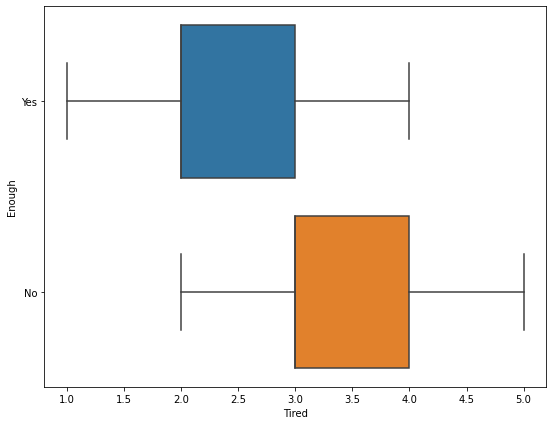

In [20]:
box_plot('Tired', 'Enough')

In [21]:
data = df.groupby(['Breakfast','Enough']) \
.apply(lambda x:x['Breakfast'].count())\
.reset_index(name='counts')
px.bar(data, x='Breakfast', y='counts', color='Enough')